# NLP - Rei Arthur 

## 1. Definição de pergunta

**Quais são as palavras mais frequentes no romance ___ e com que frequência elas ocorrem?**

## 2. Coleta de dados

In [7]:
# Importar as bibliotecas necessárias ao projeto: `requests` e 'BeautifulSoup from bs4'
re
import requests
from bs4 import BeautifulSoup


In [2]:
# 'Guardar' url

url = 'https://www.gutenberg.org/files/49057/49057-h/49057-h.htm'


In [8]:
# fazer requerimento (r=) para 'pegar' a url (.get) e verificar o tipo de objeto criado (type)

r = requests.get(url)
type(r)

requests.models.Response

In [9]:
# extrair o texto do HTML a partir do Response object e verificar o que temos
html = r.text
print(html)

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<title>Tales of King Arthur and the Round Table Adapted from the Book of Romance by Andrew Lang</title>
<meta name="author" content="Andrew Lang" />
<link rel="coverpage" href="images/cover.jpg" />
<link rel="schema.DC" href="http://dublincore.org/documents/1998/09/dces/" />
<meta name="DC.Creator" content="Andrew Lang (1844-1912)" />
<meta name="DC.Creator" content="J. C. Allen (****-****) (ed.)" />
<meta name="DC.Creator" content="Henry Justice Ford (1860-1941) (ill.)"/>
<meta name="DC.Title" content="Tales of King Arthur and the Round Table Adapted from the Book of Romance" />
<meta name="DC.Language" content="en" />
<meta name="DC.Format" content="text/html" />
<meta name="pss.pubdate" content=

In [11]:
# Criar um objeto BeautifulSoup object from the HTML
soup = BeautifulSoup(html,'html.parser')


<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<title>Tales of King Arthur and the Round Table Adapted from the Book of Romance by Andrew Lang</title>
<meta content="Andrew Lang" name="author"/>
<link href="images/cover.jpg" rel="coverpage"/>
<link href="http://dublincore.org/documents/1998/09/dces/" rel="schema.DC"/>
<meta content="Andrew Lang (1844-1912)" name="DC.Creator"/>
<meta content="J. C. Allen (****-****) (ed.)" name="DC.Creator"/>
<meta content="Henry Justice Ford (1860-1941) (ill.)" name="DC.Creator"/>
<meta content="Tales of King Arthur and the Round Table Adapted from the Book of Romance" name="DC.Title"/>
<meta content="en" name="DC.Language"/>
<meta content="text/html" name="DC.Format"/>
<meta content="1918" name="pss.pubdate"/>

O que queremos é extrair o texto da página HTML, não é mesmo? Para isso, temos o método **.get_text()**

In [12]:
# Pegar o text da sopa criada e verificar o que temos
raw = soup.getText()

print(raw)






Tales of King Arthur and the Round Table Adapted from the Book of Romance by Andrew Lang











xbody, table.twocol tr td  { margin-left:2em; margin-right:2em; }   /* BODY */

h1, h2, h3, h5, h6, .titlepg p { text-align:center; clear:right; }   /* HEADINGS */
h1          { margin-top:3em; margin-left:auto;margin-right:auto; max-width:15em; font-size:175%; }
.box h1, .box h2     { margin-top:.5em; }
h2, h3      { margin-top:2.5em; margin-bottom:1em; margin-left:auto; margin-right:auto; }
h3          { font-variant:small-caps; }
h6          { font-size:100%; font-style:italic; }
h6.var      { font-size:80%; font-style:normal; }
.titlepg    { margin-left:auto; margin-right:auto; border-style:double; clear:both; }

/* == BOXES == */
.dbox       { border-style:double; }
div.box, .dbox { margin-right:auto; margin-left:auto; max-width:25em;}
.nbox          { margin-right:auto; margin-left:auto; max-width:18em;}
div.box, div.subbox, div.nbox { border-style:solid; border-width:1px;  ma

In [13]:

raw.find('THE DRAWING OF THE SWORD')

15078

In [15]:
raw.rfind("THE END")

249279

In [16]:
raw2 = raw[15078:249279]

In [17]:
print(raw2)

THE DRAWING OF THE SWORD.
Long, long ago, after Uther Pendragon died, no king
reigned in Britain, and every Knight hoped to seize the
crown for himself. The country was like to fare ill when
laws were broken on every side, and the corn which was
to give bread to the poor was trodden underfoot, and there
was none to bring the evildoer to justice. Then, when
things were at their worst, came forth Merlin the magician,
and fast he rode to the place where the Archbishop
of Canterbury had his dwelling. They took counsel
together, and agreed that all the lords and gentlemen
of Britain should ride to London and meet on Christmas
Day, now at hand, in the Great Church. So this was
done. And on Christmas morning, as they left the church,
they saw in the churchyard a large stone, and on it a bar
of steel, and in the steel a naked sword was held, and
about it was written in letters of gold, “Whoso pulleth
out this sword is by right of birth King of England.”
They marvelled at these words, and calle

## 3. Organização de dados 

### NLP Extrair 'palavras' do texto com Natural Language Processing (NLP) ###

1. Tokenizar o texto (termo sofisticado para dividir em *tokens* (pequenas partes), como palavras);
2. Remova palavras 'irrelevantes' (palavras como 'the').

Aqui iremos usar padrão regex "palavra seguida de espaço (/w+) para recortar nosso texto.
Mas existem outros:

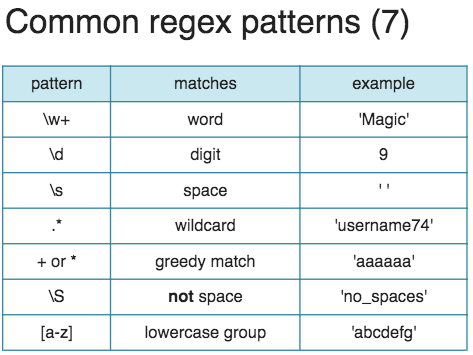

In [18]:
## Importar as bibliotecas regex e RegexpTokenizer from nltk.tokenize


from nltk.tokenize import RegexpTokenizer
from nltk.text import Text
from nltk import FreqDist

In [19]:
import re

In [21]:
# Encontrar todas a palavras do texto e examinar as 8 primeiras

tokens = re.findall("\w+", raw2)

tokens[0:4]

['THE', 'DRAWING', 'OF', 'THE']

In [ ]:
tokens[0:8]

In [23]:
# Initializr uma nova lista de palavras vazia para colacar as nossas palavras

words = []

# Criar um loop por meio do qual iremos aplicar o método .lower()

for palavra in tokens:
    words.append(palavra.lower())
    
#verificar se deu certo
words[:10]

['the',
 'drawing',
 'of',
 'the',
 'sword',
 'long',
 'long',
 'ago',
 'after',
 'uther']

**Remover stopwords**

In [24]:
import nltk
#nltk.download()
# criar objeto (sw) com as stopwords em inglês

sw = nltk.corpus.stopwords.words('english')

In [27]:
# Initializar uma nova lista para colocar as palavras do texto que não façam parte das stopwords

words_ns = []

# Criar um loop para acrescentar em 'words_ns' todas as palavras que NÃO estão em 'sw'

for palavra in words:
    if palavra not in sw:
        words_ns.append(palavra)
        
words_ns[0:8]

['drawing', 'sword', 'long', 'long', 'ago', 'uther', 'pendragon', 'died']

## Apresentação/relato dos resultados obtidos##

Para isso, é importante criar algumas visualizações para explorarmos nossos dados e verificar o que conseguimos coletar e o que os dados nos apresenta

In [28]:
#Importar biblioteca de datavis 
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Incluir o set para estilos de visualization 

%matplotlib inline
sns.set()

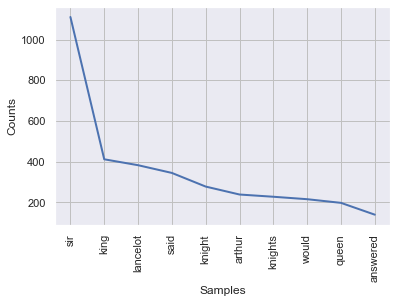

In [31]:
# Crear um plot de frequencia para analizar nossa lista words_ns


freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(10)

# plotar as 10 palavras mais usadas
#freqdist1.plot(10)

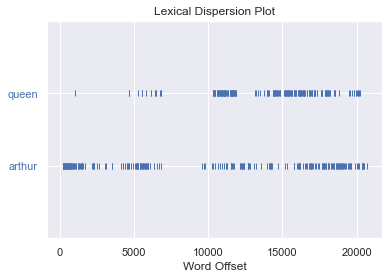

In [34]:
p = Text(words_ns)
concordance.dispersion_plot(['queen', 'arthur'])

#concordance = Text(words_ns)
#concordance.dispersion_plot(['arthur', 'lancelot'])

In [38]:
# O método concordance permite ver palavras em um contexto

concordance.concordance('queen')

Displaying 25 of 198 matches:
ches ordered sir lancelot ride fetch queen preparations marriage coronation mad
kings dukes earls barons come arthur queen guenevere also awaited queen orkney 
 arthur queen guenevere also awaited queen orkney sir gareth mother sir gareth 
ng ladies dame lyonesse fairest save queen guenevere welcomed king arthur turne
ion heart one day morgan le fay went queen guenevere asked leave go country que
een guenevere asked leave go country queen wished wait till arthur returned mor
rgan le fay said bad news could wait queen let depart without delay early next 
bey afterwards rode camelot welcomed queen knights told adventures morgan le fa
eam king minded go pilgrimage agreed queen would set forth seek holy chapel st 
re much wished undertake quest alone queen would suffer pleasure consented yout
d cried help help dead man soon king queen heard cry awoke sleep chamberlain sa
priest die king ran great speed hall queen chamberlain followed torches candles
ick hands 

In [42]:
# Expressões regulares também podem ser usadas para procurar palavras em contexto

concordance.findall("<queen> (<.*>)")
#concordance.findall("(<.*>) <arthur>")

preparations; guenevere; orkney; guenevere; guenevere; wished; let;
knights; would; would; heard; chamberlain; look; court; marvelled;
went; quest; made; knew; guenevere; said; stood; said; still;
guiltless; evil; burned; left; done; know; indeed; departed; throw;
sure; shall; champion; rejoiced; champion; innocent; world; guenevere;
guilty; sent; pleases; went; manner; put; burned; done; guenevere;
battle; knight; purpose; queen; innocence; make; guenevere; come;
kissed; prayed; hand; 88; gave; great; found; beholding; accused;
innocent; guenevere; grace; said; sight; best; sent; ruled; heard;
heard; guenevere; filled; angry; guenevere; hand; likewise; spied;
knights; found; sir; knight; battles; loved; guenevere; ladies; happy;
sought; followers; evil; shamed; may; saw; prayed; knew; seek; would;
ring; spoke; guenevere; rule; peace; cause; must; repent; knight;
would; led; evening; fair; sir; bethought; ladies; treason; guenevere;
men; else; sore; thank; falsely; lords; took; see; wa

In [43]:
concordance.findall("<arthur> (<.*>)")

kay; ride; reached; tried; follow; gave; sir; rode; rightful;
answered; replacing; arthur; surprise; heard; live; left; saw; pull;
took; accompanied; merlin; said; beheld; saluted; answered; merlin;
took; wise; knights; fought; love; desired; gladly; merlin; heard;
content; asked; flower; turning; smiting; ryons; rose; led; 12;
barons; better; court; willingly; court; merlin; commanded; called;
beheld; god; shall; would; saying; kitchen; relieve; court; charity;
kitchen; whose; lady; knights; told; knights; sir; lady; queen;
knight; marvelled; stayed; knights; tidings; two; bade; court;
quickly; turned; shining; upon; commanded; king; sister; returned;
gone; lying; waked; watched; caught; gave; gone; greatly; rested;
shall; knights; court; long; damsel; asked; 50; would; heard; 53;
court; guenevere; court; court; began; heard; looking; came; love;
said; lady; bid; told; queen; saw; took; promised; heard; proclaimed;
waited; took; knew; side; tell; find; buffeted; marvel; commanded;
cus

In [45]:
# Para uma dada palavras, é possível encontrar palavras com distribuição de texto similar 
# palavras que se relacionam
#concordance.similar('arthur')

concordance.similar('sir')

king went arthur brother said say sirs nothing damsel long merlin took
lords ride true cried new son haste though


In [46]:
for w in words_ns:
    print(f" tamanho da palavra {w}: {len(w)}")

 tamanho da palavra drawing: 7
 tamanho da palavra sword: 5
 tamanho da palavra long: 4
 tamanho da palavra long: 4
 tamanho da palavra ago: 3
 tamanho da palavra uther: 5
 tamanho da palavra pendragon: 9
 tamanho da palavra died: 4
 tamanho da palavra king: 4
 tamanho da palavra reigned: 7
 tamanho da palavra britain: 7
 tamanho da palavra every: 5
 tamanho da palavra knight: 6
 tamanho da palavra hoped: 5
 tamanho da palavra seize: 5
 tamanho da palavra crown: 5
 tamanho da palavra country: 7
 tamanho da palavra like: 4
 tamanho da palavra fare: 4
 tamanho da palavra ill: 3
 tamanho da palavra laws: 4
 tamanho da palavra broken: 6
 tamanho da palavra every: 5
 tamanho da palavra side: 4
 tamanho da palavra corn: 4
 tamanho da palavra give: 4
 tamanho da palavra bread: 5
 tamanho da palavra poor: 4
 tamanho da palavra trodden: 7
 tamanho da palavra underfoot: 9
 tamanho da palavra none: 4
 tamanho da palavra bring: 5
 tamanho da palavra evildoer: 8
 tamanho da palavra justice: 7
 tama

In [48]:
palavas_com_10_caracteres = [w for w in words_ns if len(w) > 10]
print(f"palavras maiores com mais de 10 letras: {palavas_com_10_caracteres}\a")

palavras maiores com mais de 10 letras: ['differently', 'accompanied', 'courteously', 'disappeared', 'leodegrance', 'leodegrance', 'leodegrance', 'leodegrance', 'leodegrance', 'preparations', 'overflowing', 'unconscious', 'twelvemonth', 'whitsuntide', 'whitsuntide', 'deliverance', 'uncourteous', 'defenceless', 'straightway', 'proclamation', 'twelvemonth', 'chamberlain', 'candlesticks', 'candlestick', 'candlesticks', 'chamberlain', 'chamberlain', 'candlestick', 'candlestick', 'candlestick', 'candlestick', 'strengthened', 'countenance', 'courteously', 'candlestick', 'candlestick', 'candlestick', 'discomfited', 'sorrowfully', 'adventurous', 'misadventure', 'everlasting', 'exceedingly', 'complaining', 'unknowingly', 'temptations', 'gentlewoman', 'gentlewoman', 'gentlewoman', 'gentlewoman', 'gentlewoman', 'gentlewoman', 'gentlewoman', 'forgiveness', 'forgiveness', 'westminster', 'westminster', 'acknowledging', 'deliverance', 'westminster', 'whitsuntide', 'nevertheless', 'embroidered', 'west

In [ ]:
for w in  words_ns:
    print(f"última letra - {w}: {w[-1]}")

In [ ]:
for w in words_ns:
    print(f'primeira letra - {w}: {w[0]}')

In [49]:
palavras_em_ing = [w for w in words_ns if w.endswith('ing')]
print(f"palavras terminadas em 'ing': {palavras_em_ing}")

palavras terminadas em 'ing': ['drawing', 'king', 'bring', 'dwelling', 'morning', 'king', 'king', 'pulling', 'according', 'evening', 'running', 'king', 'leaving', 'turning', 'king', 'king', 'king', 'replacing', 'lying', 'king', 'concerning', 'standing', 'king', 'thing', 'king', 'king', 'king', 'king', 'healing', 'rising', 'holding', 'king', 'coming', 'holding', 'king', 'king', 'king', 'holding', 'king', 'smiling', 'king', 'king', 'king', 'king', 'king', 'king', 'king', 'king', 'something', 'king', 'king', 'journeying', 'king', 'coming', 'king', 'bring', 'blessing', 'king', 'bidding', 'king', 'king', 'king', 'speaking', 'bringing', 'riding', 'king', 'king', 'king', 'king', 'king', 'nothing', 'bring', 'turning', 'king', 'king', 'king', 'praying', 'smiting', 'king', 'king', 'overflowing', 'bring', 'king', 'king', 'king', 'king', 'king', 'king', 'standing', 'taking', 'setting', 'king', 'bring', 'living', 'riding', 'turning', 'reading', 'writing', 'crying', 'living', 'riding', 'pausing', 'f

In [ ]:
palavras_com_dis = [w for w in words_ns if w.startswith ('dis')]
print(f"palavras com 'dis': {palavras_com_dis}")